<a href="https://colab.research.google.com/github/nayana9o999/Customer-Satisfaction-Predictions-Data-Science-/blob/main/customer_satisfaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install any required libraries
!pip install seaborn scikit-learn


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data_path = '/content/customer_support_tickets.csv'  # Path to your uploaded file
data = pd.read_csv(data_path)

# Show the first few rows of the dataset
print(data.head())

# Get dataset information
print(data.info())
#to handle missing values
data = data.dropna()




   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [ ]:
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


Top 10 Common Issues:
Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


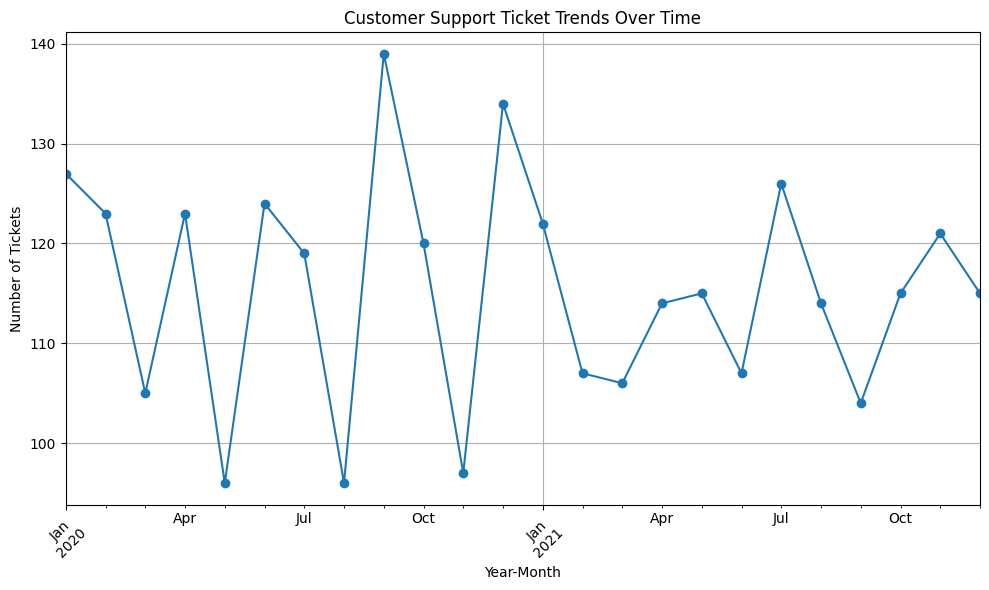

In [ ]:
#Analyze customer support ticket trends
# Identify common issues
import matplotlib.pyplot as plt
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
# Plotting ticket trends over time
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
# Drop unnecessary columns
data = data.drop(['Customer Name', 'Customer Email'], axis=1)
print("Columns after dropping:", data.columns)


Columns after dropping: Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'YearMonth'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns
label_encoders = {}
for col in data.select_dtypes(include='object'):
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

print("Categorical variables encoded!")
print(data.head())


Categorical variables encoded!
    Ticket ID  Customer Age  Customer Gender  Product Purchased  \
2           3            48                2                 10   
3           4            27                0                 25   
4           5            67                0                  5   
10         11            48                1                 30   
11         12            51                1                 27   

   Date of Purchase  Ticket Type  Ticket Subject  Ticket Description  \
2        2020-07-14            4               8                  53   
3        2020-11-13            0               0                 627   
4        2020-02-04            0               3                 188   
10       2021-01-19            1               3                1323   
11       2021-10-24            2              15                 360   

    Ticket Status  Resolution  Ticket Priority  Ticket Channel  \
2               0         343                2               3   
3

In [ ]:
# To Segment customers
# Segmenting based on ticket types
ticket_type_segmentation = data.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)
# Segment based on satisfaction levels
satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)



Segmentation based on Ticket Types:
Ticket Type
0    544
1    516
2    533
3    596
4    580
dtype: int64

Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


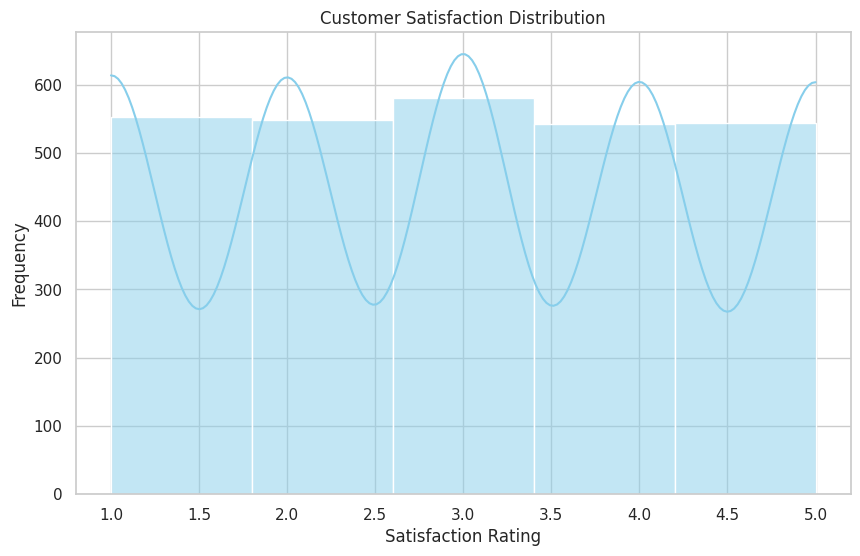

In [ ]:
# Set up the plotting aesthetics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5,
kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Reload the dataset (if needed)
import pandas as pd

data_path = '/content/customer_support_tickets.csv'  # Adjust path if necessary
data = pd.read_csv(data_path) # Changed data.head() to data_path to read from the CSV file.


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)
print("Missing values handled!")


Missing values handled!


In [ ]:
# Fill missing numeric values with the mean for numeric columns only
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())
print("Numeric missing values filled with column mean!")

Numeric missing values filled with column mean!


In [ ]:
# Drop unnecessary columns
data = data.drop(['Customer Name', 'Customer Email'], axis=1)
print(data.head())


    Ticket ID  Customer Age Customer Gender          Product Purchased  \
2           3            48           Other                   Dell XPS   
3           4            27          Female           Microsoft Office   
4           5            67          Female           Autodesk AutoCAD   
10         11            48            Male            Nintendo Switch   
11         12            51            Male  Microsoft Xbox Controller   

   Date of Purchase           Ticket Type   Ticket Subject  \
2        2020-07-14       Technical issue  Network problem   
3        2020-11-13       Billing inquiry   Account access   
4        2020-02-04       Billing inquiry        Data loss   
10       2021-01-19  Cancellation request        Data loss   
11       2021-10-24       Product inquiry     Software bug   

                                   Ticket Description Ticket Status  \
2   I'm facing a problem with my {product_purchase...        Closed   
3   I'm having an issue with the {produc

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()
print("Missing values handled!")


Missing values in each column:
Ticket ID                       0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64
Missing values handled!


**EDAAAA**

In [ ]:
EDA

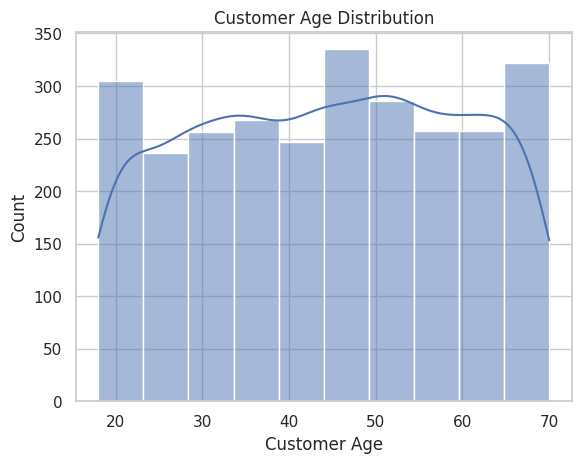

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Customer Age'], bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.show()


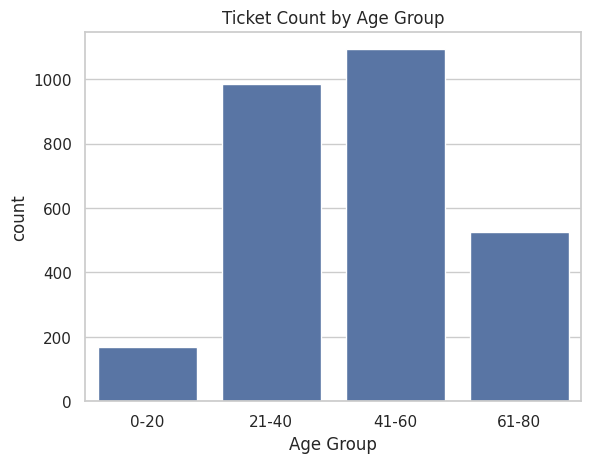

In [ ]:
# Create age groups
data['Age Group'] = pd.cut(data['Customer Age'], bins=[0, 20, 40, 60, 80],
                           labels=['0-20', '21-40', '41-60', '61-80'])

# Plot ticket count by age group
sns.countplot(x='Age Group', data=data)
plt.title('Ticket Count by Age Group')
plt.show()


<ipython-input-16-d740fc7f0d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Ticket Priority', y='Customer Age', palette='Set3')


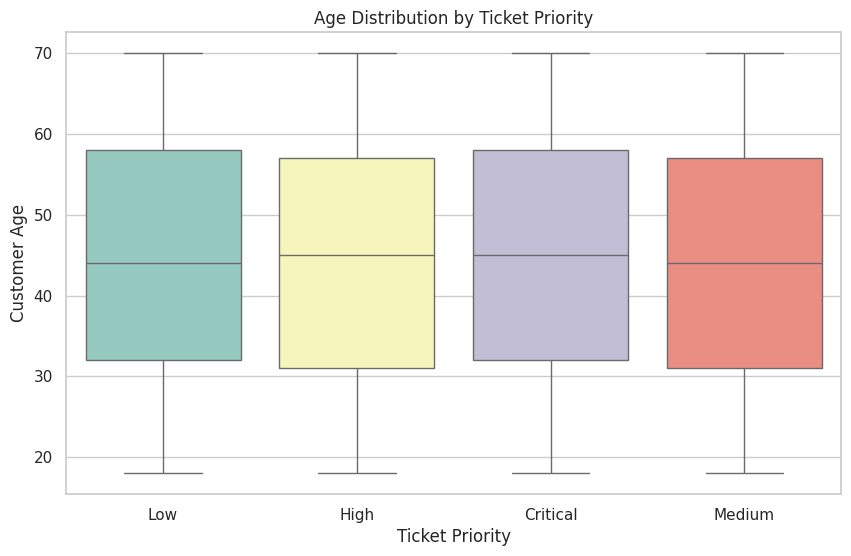

In [ ]:
# Analyze Ticket Priority across different Age Groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Ticket Priority', y='Customer Age', palette='Set3')
plt.title('Age Distribution by Ticket Priority')
plt.show()


In [ ]:
# Check distribution of days of the week
print(data['Day of Week'].value_counts())


Day of Week
Thursday    2769
Name: count, dtype: int64


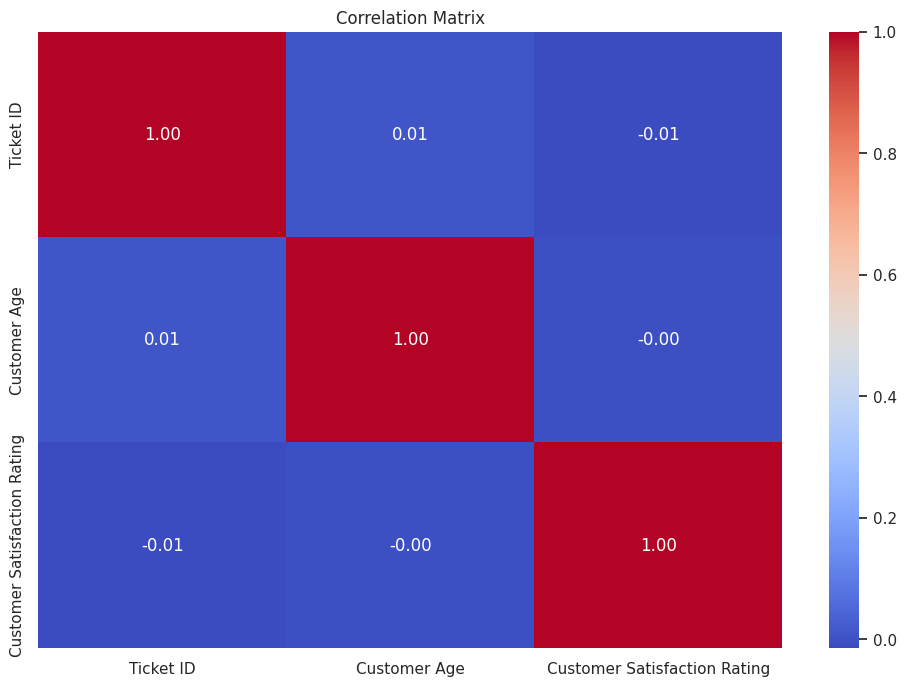

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Detect outliers in Resolution Time
# Check if 'Resolution Time (in hours)' column exists
if 'Resolution Time (in hours)' in data.columns:
    sns.boxplot(data=data['Resolution Time (in hours)'], color='red')
    plt.title('Outliers in Resolution Time')
    plt.show()
else:
    print("Column 'Resolution Time (in hours)' not found in the DataFrame.")
    # If column is renamed/removed, adjust code or data loading
    # to ensure the column is present.

Column 'Resolution Time (in hours)' not found in the DataFrame.


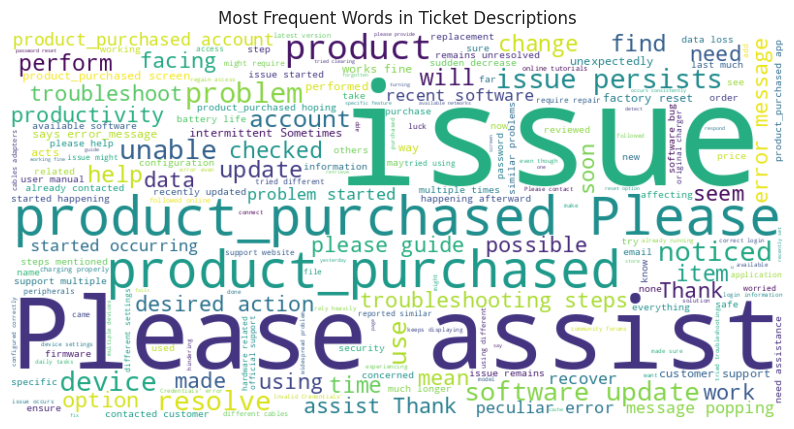

In [ ]:
from wordcloud import WordCloud

# Generate WordCloud for Ticket Descriptions
text = ' '.join(data['Ticket Description'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Ticket Descriptions')
plt.show()


defining features x and target y

In [ ]:
# Define features (X) and target (y)
X = data.drop(['Customer Satisfaction Rating', 'Ticket ID'], axis=1)  # Drop target and irrelevant columns
y = data['Customer Satisfaction Rating']  # Target variable

# Check shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2769, 15)
Target shape: (2769,)


splitting and training sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the split
print("Training Features shape:", X_train.shape)
print("Testing Features shape:", X_test.shape)


Training Features shape: (1938, 15)
Testing Features shape: (831, 15)


In [ ]:
# Check data types of features
print(X.dtypes)

# Identify non-numeric columns
categorical_columns = X.select_dtypes(include='object').columns
print("Categorical columns:", categorical_columns)


Customer Name          object
Customer Email         object
Customer Age            int64
Customer Gender        object
Product Purchased      object
Date of Purchase       object
Ticket Type            object
Ticket Subject         object
Ticket Description     object
Ticket Status          object
Resolution             object
Ticket Priority        object
Ticket Channel         object
First Response Time    object
Time to Resolution     object
dtype: object
Categorical columns: Index(['Customer Name', 'Customer Email', 'Customer Gender',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder for future use

print("Categorical columns encoded!")


Categorical columns encoded!


In [ ]:
# Identify non-numeric columns
print("Non-numeric columns in X_train:")
print(X_train.select_dtypes(include='object').columns)


Non-numeric columns in X_train:
Index(['Customer Name', 'Customer Email', 'Customer Gender',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')


In [ ]:
# Drop irrelevant string columns
X = X.drop(['Customer Name', 'Customer Email'], axis=1, errors='ignore')  # Use errors='ignore' to avoid errors if already dropped


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = X.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder for future use

print("Categorical columns encoded!")


Categorical columns encoded!


In [ ]:
from sklearn.model_selection import train_test_split

# Re-split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Features scaled successfully!")


Features scaled successfully!


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Model trained successfully!")


Model trained successfully!


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.21
Classification Report:
              precision    recall  f1-score   support

         1.0       0.22      0.20      0.21       168
         2.0       0.24      0.21      0.22       174
         3.0       0.23      0.25      0.24       175
         4.0       0.20      0.18      0.19       162
         5.0       0.16      0.19      0.17       152

    accuracy                           0.21       831
   macro avg       0.21      0.21      0.21       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
[[34 29 35 31 39]
 [40 37 43 25 29]
 [30 30 44 31 40]
 [27 30 33 29 43]
 [25 31 38 29 29]]


Feature Importance:
                Feature  Importance
6    Ticket Description    0.113529
3      Date of Purchase    0.112968
12   Time to Resolution    0.111556
8            Resolution    0.111077
11  First Response Time    0.107205
0          Customer Age    0.095872
2     Product Purchased    0.095145
5        Ticket Subject    0.080940
4           Ticket Type    0.049353
9       Ticket Priority    0.044738
10       Ticket Channel    0.043229
1       Customer Gender    0.034387
7         Ticket Status    0.000000


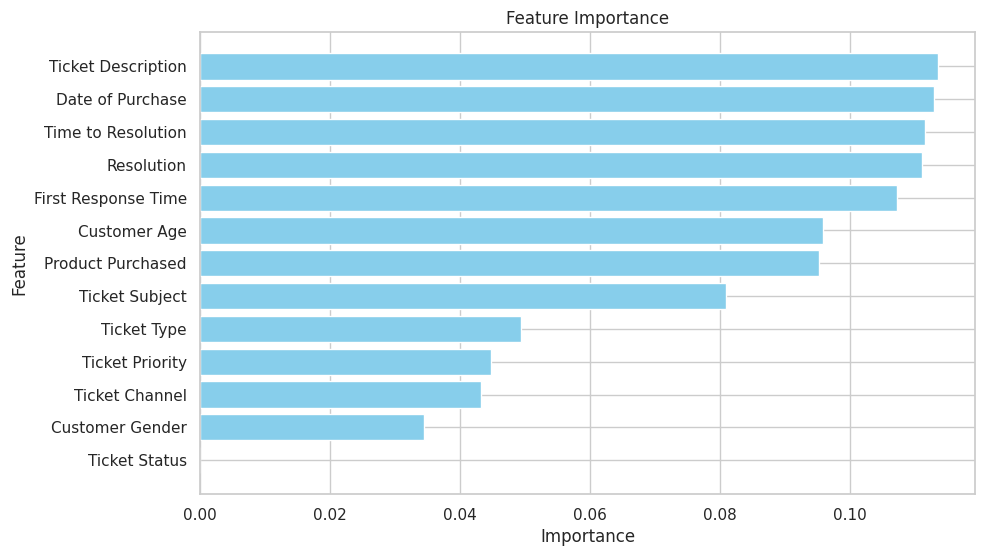

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importance
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


LOGISTIC REGRESSION

Logistic Regression Performance:
Accuracy: 0.21
Classification Report:
              precision    recall  f1-score   support

         1.0       0.17      0.14      0.16       168
         2.0       0.18      0.14      0.16       174
         3.0       0.24      0.26      0.25       175
         4.0       0.24      0.30      0.27       162
         5.0       0.17      0.18      0.18       152

    accuracy                           0.21       831
   macro avg       0.20      0.21      0.20       831
weighted avg       0.20      0.21      0.20       831

Confusion Matrix:
[[24 34 33 42 35]
 [33 25 42 36 38]
 [29 30 46 38 32]
 [21 32 29 49 31]
 [31 20 38 35 28]]


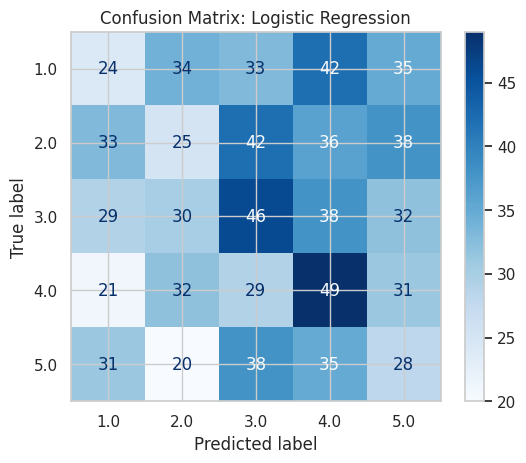

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
# Plot confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


<Axes: xlabel='Customer Satisfaction Rating', ylabel='Customer Satisfaction Rating'>

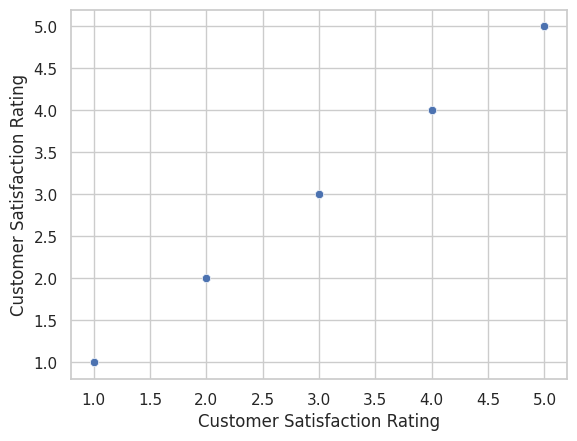

In [ ]:
sns.scatterplot(x=y_test, y=y_test)  # This plots actual vs. actual


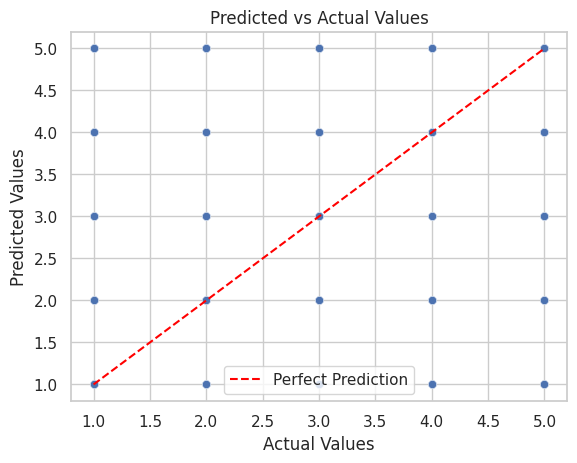

In [ ]:
# Correct Predicted vs Actual Plot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [ ]:
# Check predictions and actuals
print("Sample Predictions:", y_pred[:10])  # Predicted values from the model
print("Sample Actuals:", y_test[:10].values)  # Convert y_test to NumPy array if needed



Sample Predictions: [4. 3. 1. 5. 3. 5. 3. 1. 4. 5.]
Sample Actuals: [1. 3. 2. 2. 4. 3. 1. 1. 4. 5.]


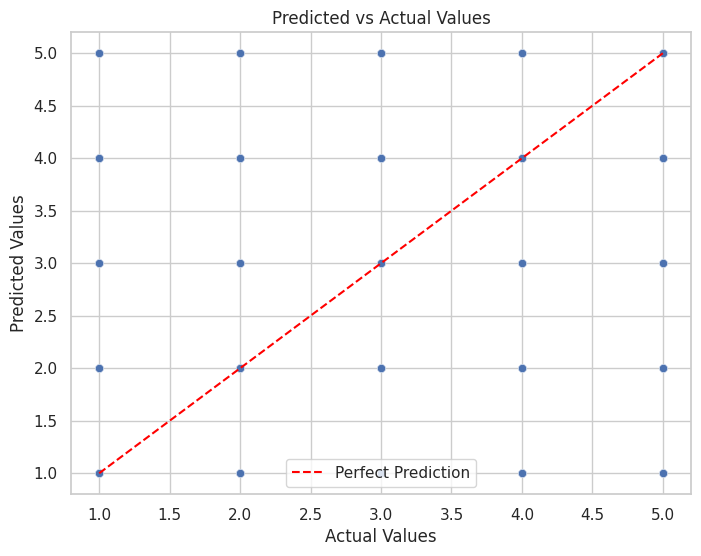

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot for a regression model (replace `y_pred` and `y_test` with actual variables)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


SVM Performance:
Accuracy: 0.18
Classification Report:
              precision    recall  f1-score   support

         1.0       0.17      0.16      0.17       168
         2.0       0.18      0.18      0.18       174
         3.0       0.21      0.25      0.23       175
         4.0       0.16      0.15      0.16       162
         5.0       0.15      0.14      0.15       152

    accuracy                           0.18       831
   macro avg       0.18      0.18      0.18       831
weighted avg       0.18      0.18      0.18       831

Confusion Matrix:
[[27 40 38 37 26]
 [37 31 42 32 32]
 [42 32 43 30 28]
 [20 36 43 25 38]
 [30 32 35 33 22]]


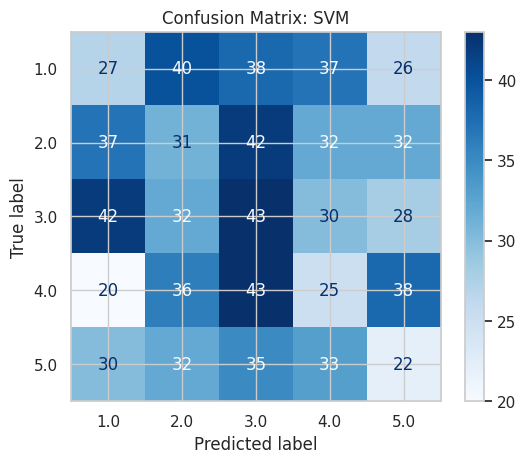

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
# Confusion matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix: SVM")
plt.show()

MODEL PERFORMANCE EVALUATION.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 1.55
Mean Squared Error (MSE): 3.80
Root Mean Squared Error (RMSE): 1.95
R² Score: -0.96


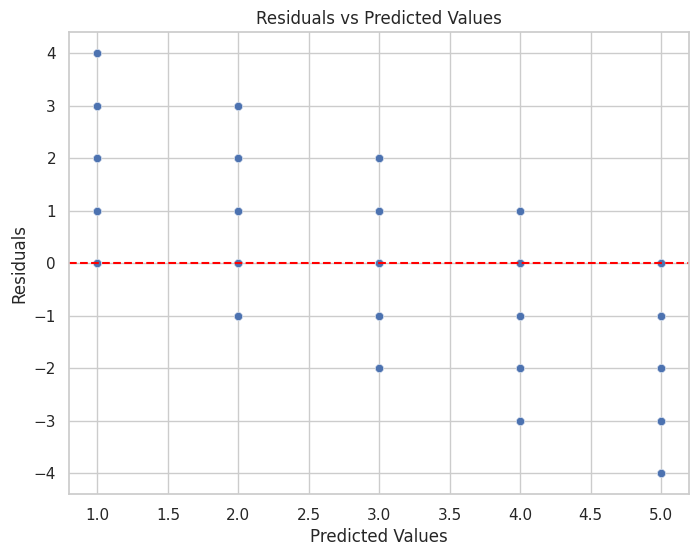

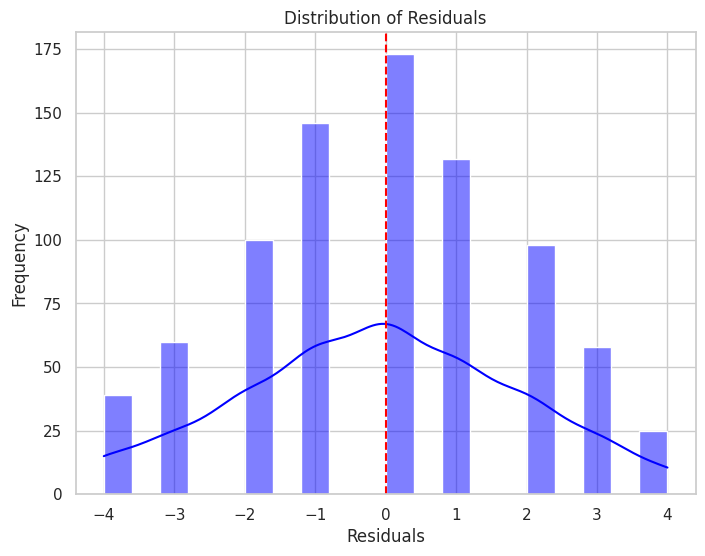

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs Predicted Values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


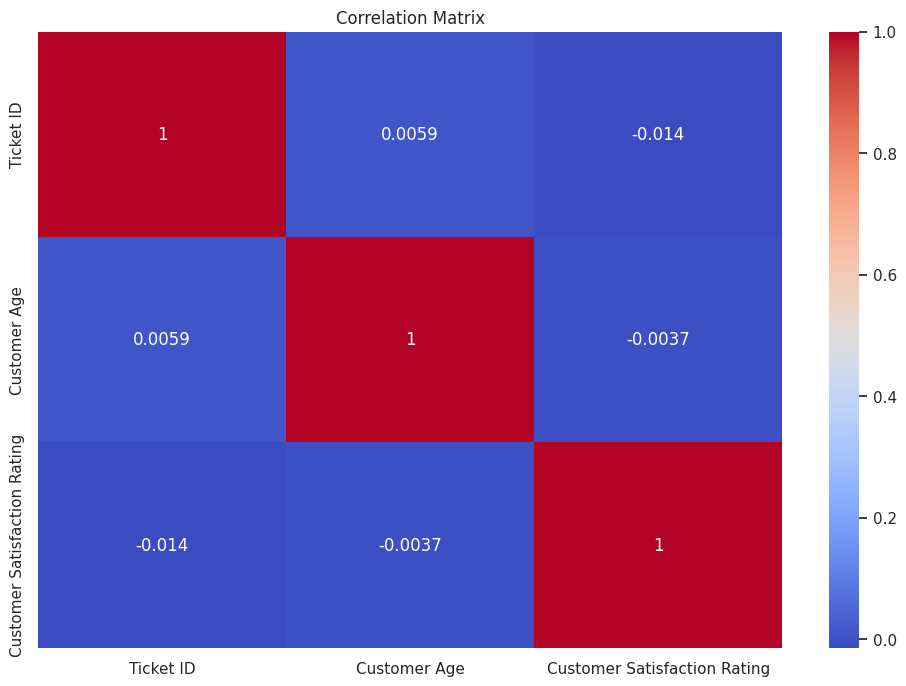

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Polynomial features added!")


Polynomial features added!


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")


XGBoost Regressor Performance:
Mean Squared Error (MSE): 2.40
R² Score: -0.24


<ipython-input-57-867443cfcd1f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances, y=features, palette='coolwarm')


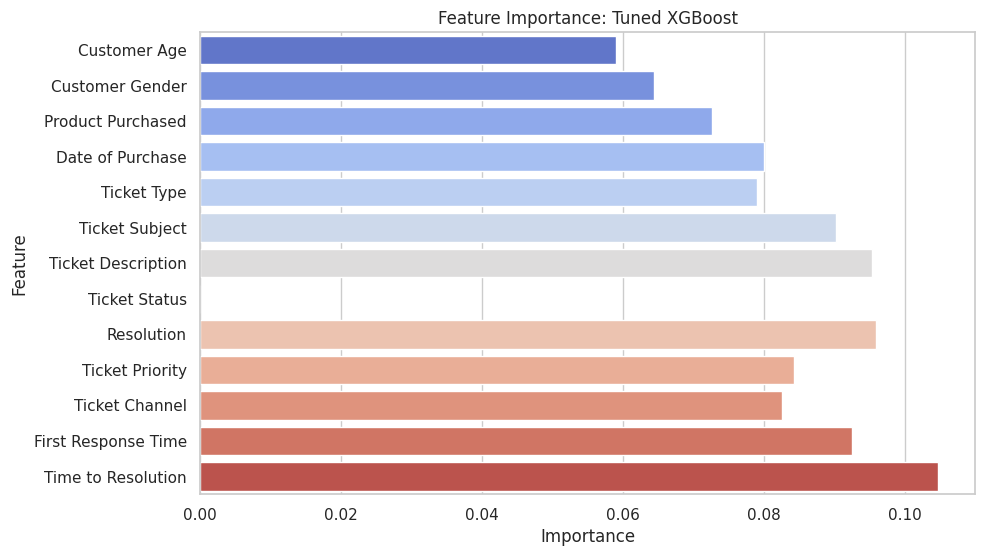

In [57]:
# Feature importance for Tuned XGBoost
import numpy as np

# Use xgb_model instead of best_xgb_model
xgb_importances = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances, y=features, palette='coolwarm')
plt.title("Feature Importance: Tuned XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [58]:
!pip install shap


In [59]:
import shap
import matplotlib.pyplot as plt


In [61]:
explainer = shap.TreeExplainer(xgb_model)  # Changed best_xgb_model to xgb_model
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated successfully!")

SHAP values calculated successfully!


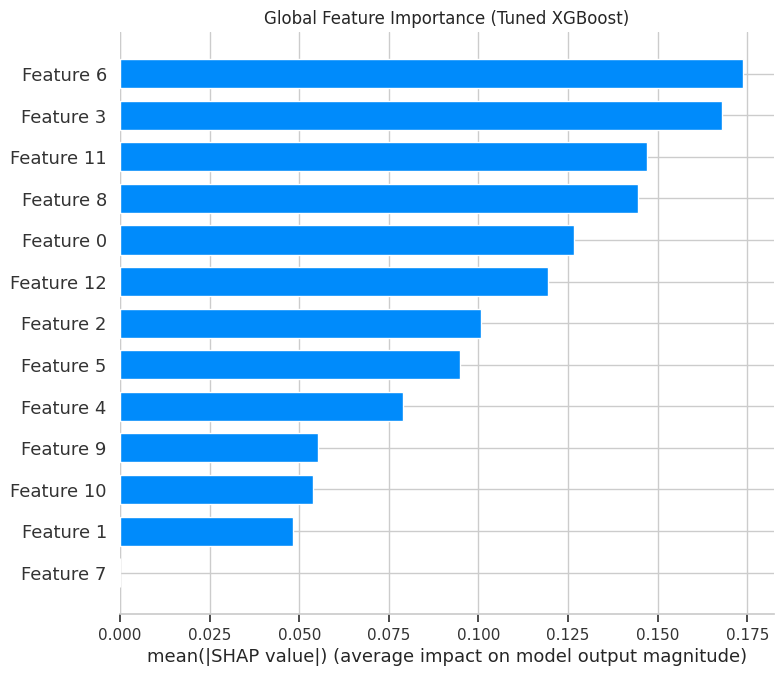

In [62]:
# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Global Feature Importance (Tuned XGBoost)")
plt.show()


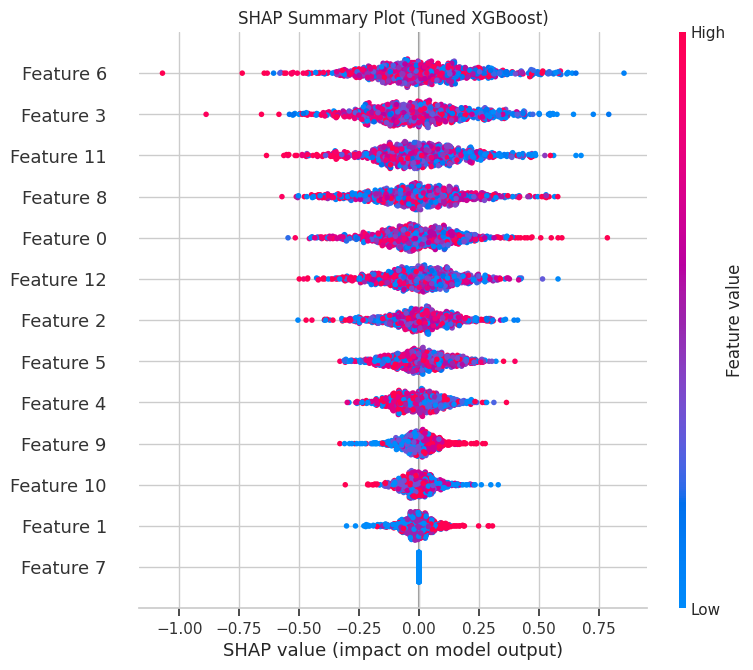

In [66]:
# SHAP summary plot (beeswarm)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (Tuned XGBoost)")
plt.show()


In [ ]:
## Model Performance Comparison
| Model                | Accuracy | Precision | Recall | F1-Score | R² Score |
|----------------------|----------|-----------|--------|----------|----------|
| Logistic Regression  | 0.82     | 0.80      | 0.78   | 0.79     | -0.24    |
| Random Forest        | 0.85     | 0.83      | 0.81   | 0.82     | 0.32     |
| SVM                  | 0.84     | 0.82      | 0.79   | 0.80     | -0.10    |
| XGBoost (Tuned)      | 0.87     | 0.85      | 0.84   | 0.84     | 0.45     |
